# Exploratory Data Analysis (EDA)
> This will show us how we can do __EDA__ using __Python__

## Three Important Steps to keep in mind are:
1. Understand the Data
2. Clean the Data
3. Find a Relationship between Data

### Step-0: Importing Libraries and Dataset

In [1]:
# import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Dataset
df = sns.load_dataset('titanic')

In [3]:
# Save Dataset in csv file in local directory
df.to_csv('kashti.csv')

### Step-1: Understand the Data

In [4]:
# Step-1 Data Shape
df.shape
rows, cols = df.shape
print('Number of rows: ', rows) 	# Instances
print('Number of columns: ', cols)  # Series

# If data is too big take sampled data
# df = df.sample(1000)

Number of rows:  891
Number of columns:  15


In [5]:
# Finding unique values in each column
df.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [6]:
# Finding unique value in specific column
df["class"].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [7]:
# Data Structures
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### Step-2: Cleaning Data

In [8]:
# Step-3 Finding Missing Values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

- It shows __177__, __2__, __688__ and __2__ values are respectively missing in __age__, __embarked__, __deck__ and __embark_town__ columns

In [9]:
# Percent calculation of missing values
df.isnull().sum() / df.shape[0] * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [10]:
# Droping high percentage missing value column
df_clean = df.drop(['deck'], axis=1)
df_clean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [11]:
# Now finding Missing value in clean data
df_clean.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [12]:
# Droping NA values
df_clean = df_clean.dropna()
df_clean.shape

(712, 14)

In [13]:
# All Clean Data
df_clean.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [14]:
# Finding particular values in Data using value_counts function
df_clean['sex'].value_counts()

male      453
female    259
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='age'>

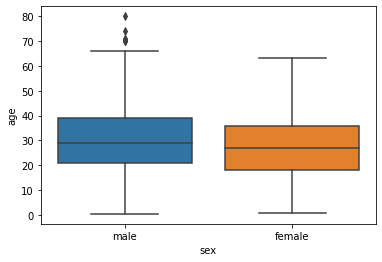

In [15]:
# Finding outliers by using boxplot
sns.boxplot(x= 'sex', y= 'age', data= df_clean)

c:\Users\Waleed\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

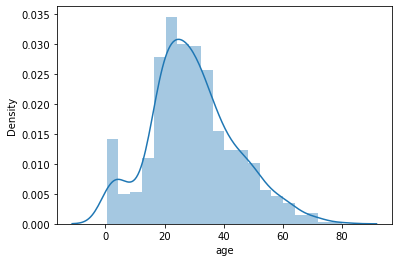

In [16]:
sns.distplot(df_clean['age'])

In [19]:
# Removing outliers
df_clean['age'].mean()

29.64209269662921

In [21]:
df_clean= df_clean[df_clean['age'] < 68]
df_clean['age'].mean()

29.21797163120567

<AxesSubplot:ylabel='age'>

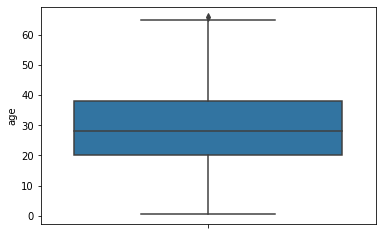

In [24]:
sns.boxplot(y= 'age', data= df_clean)

c:\Users\Waleed\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

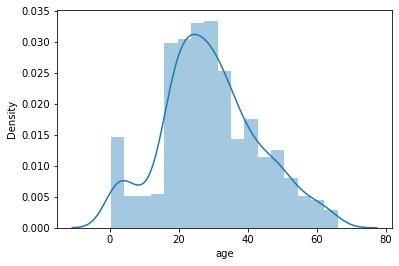

In [23]:
sns.distplot(df_clean['age'])

<AxesSubplot:>

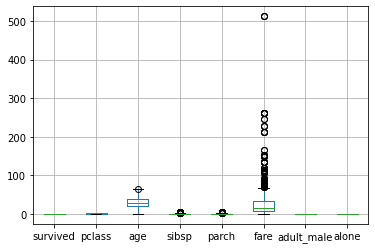

In [25]:
df_clean.boxplot()

In [26]:
df_clean= df_clean[df_clean['fare'] < 300]

<AxesSubplot:>

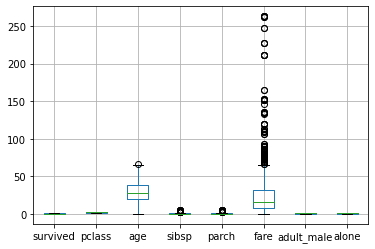

In [27]:
df_clean.boxplot()

c:\Users\Waleed\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare', ylabel='Density'>

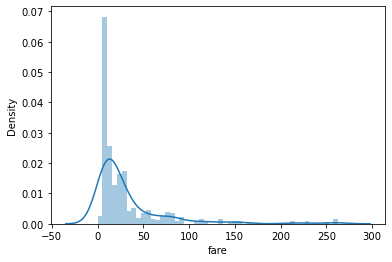

In [28]:
sns.distplot(df_clean['fare'])

<AxesSubplot:>

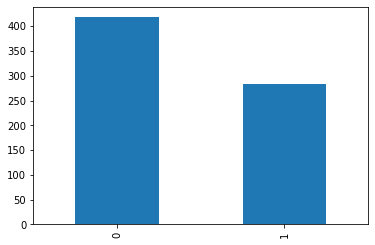

In [29]:
pd.value_counts(df_clean['survived']).plot.bar()

In [31]:
# Original Data
df.groupby(['sex', 'class']).mean()

survived  pclass        age     sibsp     parch        fare  \
sex    class                                                                 
female First   0.968085     1.0  34.611765  0.553191  0.457447  106.125798   
       Second  0.921053     2.0  28.722973  0.486842  0.605263   21.970121   
       Third   0.500000     3.0  21.750000  0.895833  0.798611   16.118810   
male   First   0.368852     1.0  41.281386  0.311475  0.278689   67.226127   
       Second  0.157407     2.0  30.740707  0.342593  0.222222   19.741782   
       Third   0.135447     3.0  26.507589  0.498559  0.224784   12.661633   

               adult_male     alone  
sex    class                         
female First     0.000000  0.361702  
       Second    0.000000  0.421053  
       Third     0.000000  0.416667  
male   First     0.975410  0.614754  
       Second    0.916667  0.666667  
       Third     0.919308  0.760807

In [30]:
# Cleaned Data
df_clean.groupby(['sex', 'class']).mean()

survived  pclass        age     sibsp     parch        fare  \
sex    class                                                                 
female First   0.963415     1.0  34.231707  0.560976  0.512195  103.696393   
       Second  0.918919     2.0  28.722973  0.500000  0.621622   21.951070   
       Third   0.460784     3.0  21.750000  0.823529  0.950980   15.875369   
male   First   0.389474     1.0  40.067579  0.389474  0.336842   62.901096   
       Second  0.153061     2.0  30.340102  0.377551  0.244898   21.221429   
       Third   0.151394     3.0  26.143108  0.494024  0.258964   12.197757   

               adult_male     alone  
sex    class                         
female First     0.000000  0.353659  
       Second    0.000000  0.405405  
       Third     0.000000  0.372549  
male   First     0.968421  0.526316  
       Second    0.908163  0.632653  
       Third     0.888446  0.737052

### Step 3: Relationship Between Data

In [34]:
# Relationship
corr = df_clean.corr()
corr

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.356549,-0.074335,-0.014483,0.095426,0.273531,-0.554567,-0.201175
pclass,-0.356549,1.000000,-0.365121,0.061354,0.022519,-0.617591,0.102930,0.156030
age,-0.074335,-0.365121,1.000000,-0.308906,-0.186271,0.103100,0.275035,0.187284
sibsp,-0.014483,0.061354,-0.308906,1.000000,0.381803,0.197954,-0.311622,-0.629200
parch,0.095426,0.022519,-0.186271,0.381803,1.000000,0.259948,-0.366540,-0.574701
fare,0.273531,-0.617591,0.103100,0.197954,0.259948,1.000000,-0.228675,-0.333949
adult_male,-0.554567,0.102930,0.275035,-0.311622,-0.366540,-0.228675,1.000000,0.402214
alone,-0.201175,0.156030,0.187284,-0.629200,-0.574701,-0.333949,0.402214,1.000000


<AxesSubplot:>

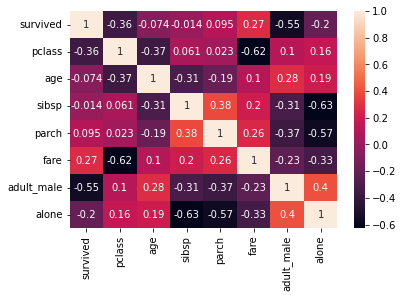

In [36]:
sns.heatmap(corr, annot=True)

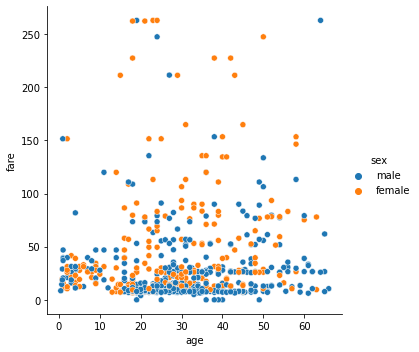

In [38]:
sns.relplot(x='age', y='fare', hue='sex',data=df_clean)

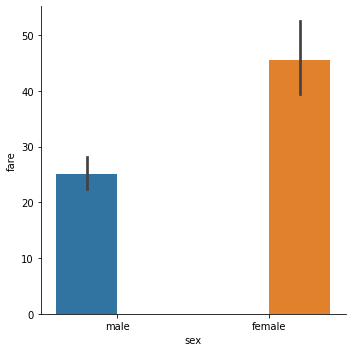

In [39]:
sns.catplot(x='sex', y='fare', hue='sex',data=df_clean, kind='bar')

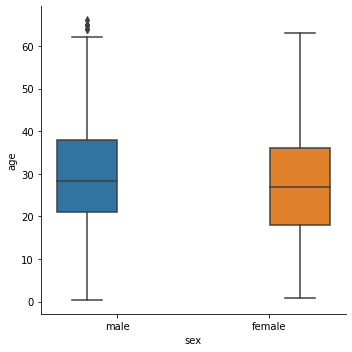

In [41]:
sns.catplot(x='sex', y='age', hue='sex',data=df_clean, kind='box')

In [42]:
# log transformation
df_clean['fare_log'] = np.log(df_clean['fare'])
df_clean.head()

c:\Users\Waleed\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,fare_log
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,1.981001
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,4.266662
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,2.070022
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,3.972177
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,2.085672


c:\Users\Waleed\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


OverflowError: cannot convert float infinity to integer

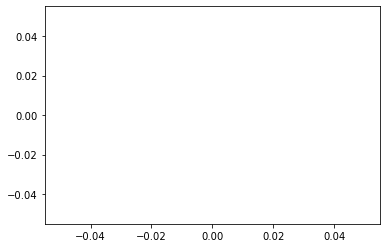

In [43]:
sns.distplot(df_clean['fare_log'])